## This is the (?) practical task of Sirius summer school "Applying AI for Med image analysis". 
Practical tasks take form of jupyter notebook with example code in the begging and some tasks in the end. Please, provide your solution in form of python code. Read hints, google a lot, don't hesitate to ask us directyl and most importatly - 
<span style="color:blue">have fun</span>.

**Topic**: Morphological operators

**To submit**: New version of the notebook, with your code. 

**Task**: This time you will have to implement two morphological operators (dilation and erosion) withouth using any high-level libraries. Your goal is to compare your results with standard implementation and hopefully achieve similar results. 

In [9]:
import warnings
warnings.filterwarnings("ignore")
import pydicom 
from matplotlib import pyplot as plt
file = pydicom.read_file("./data/aorta/1/I10.dicom")
img = file.pixel_array



In [10]:
from skimage import morphology as mh

def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

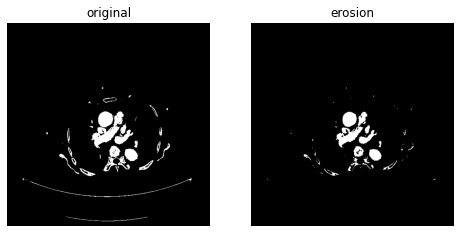

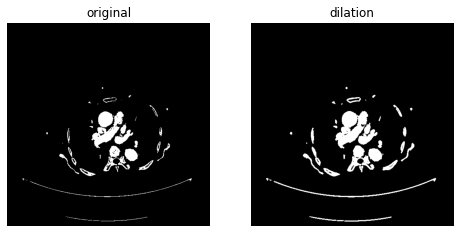

In [11]:
binarized = img>1200 #some arbitrary thresholding 
plot_comparison(binarized,(mh.erosion(binarized)),"erosion")
plot_comparison(binarized,(mh.dilation(binarized)),"dilation")


In [12]:
import numpy as np #The only library you allowed to use :D 

## **Task:**
- This time you will have to implement two morphological operators (dilation and erosion) withouth using any high-level libraries. Your goal is to compare your results with standard implementation and hopefully achieve similar results. 
- Given: two function signatures
- Do: Create your own version using only numpy library and compare them with skimage versions. You are **not** allowed to use opencv, skimage. If in doubt about some library - ask us directly


### Good luck, have fun. 
ps. you can google ideas, but please try to write your own code. 

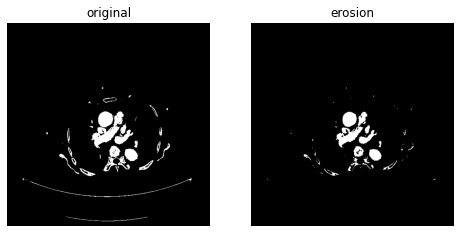

In [13]:
def my_erosion(image, selem=None):

    new_image = np.zeros((512, 512), dtype=np.int8)

    for i in range(1, 511):
      for j in range(1, 511):
        if image[i][j] != 0:

          new_image[i][j] = 1
          if image[i][j - 1] == 0 or image[i][j - 1] == 0 or image[i - 1][j] == 0 or image[i][j + 1] == 0 or image[i + 1][j] == 0:
            new_image[i][j] = 2

    new_image[new_image > 1] = 0

    return new_image

binarized = img>1200  
plot_comparison(binarized,(my_erosion(binarized)),"erosion")

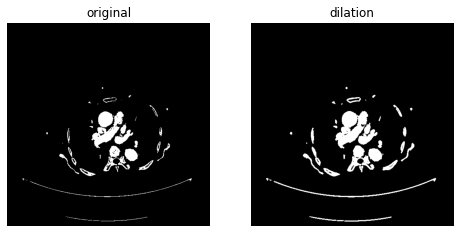

In [15]:
def my_dilation(image, selem=None):

    new_image = np.zeros((512, 512), dtype=np.int8)

    for i in range(1, 511):
      for j in range(1, 511):
        if image[i][j] != 0:

          new_image[i][j] = 1
          new_image[i][j - 1] = 1
          new_image[i - 1][j] = 1
          new_image[i][j + 1] = 1
          new_image[i + 1][j] = 1

    return new_image

binarized = img>1200  
plot_comparison(binarized,(my_dilation(binarized)),"dilation")